<a href="https://colab.research.google.com/github/NatashaSekhon/Nat_S/blob/main/Web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
from bs4 import BeautifulSoup
import requests

In [79]:
url = "https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue"
page = requests.get(url)
soup = BeautifulSoup(page.text,'html')


In [80]:
print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned

In [81]:
table = soup.find_all('table')[1]

In [20]:
headers=table.find_all('th')
print(headers)
table_header = [title.text.strip() for title in headers]
print(table_header)

[<th>Rank
</th>, <th>Name
</th>, <th>Industry
</th>, <th>Revenue <br/>(USD millions)
</th>, <th>Revenue growth
</th>, <th>Employees
</th>, <th>Headquarters
</th>]
['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [92]:
import pandas as pd
df_new= pd.DataFrame(columns = table_header)

In [93]:
print(len(df_new))

0


In [94]:
rows = table.find_all('tr')
for row in rows[1:]:
    # Find all cells (td) in the row
    cells = row.find_all('td')

    # Extract and print the text content of each cell
    row_data = [cell.text.strip() for cell in cells]
    length=len(df_new)
    df_new.loc[length]=row_data


In [95]:
print(df_new)

   Rank                      Name                    Industry  \
0     1                   Walmart                      Retail   
1     2                    Amazon  Retail and cloud computing   
2     3                ExxonMobil          Petroleum industry   
3     4                     Apple        Electronics industry   
4     5        UnitedHealth Group                  Healthcare   
..  ...                       ...                         ...   
95   96                  Best Buy                      Retail   
96   97      Bristol-Myers Squibb     Pharmaceutical industry   
97   98           United Airlines                     Airline   
98   99  Thermo Fisher Scientific      Laboratory instruments   
99  100                  Qualcomm                  Technology   

   Revenue (USD millions) Revenue growth  Employees             Headquarters  
0                 611,289           6.7%  2,100,000    Bentonville, Arkansas  
1                 513,983           9.4%  1,540,000      Seat

In [96]:
try:
    df_new.to_excel('/content/companies_list.xlsx', index=False)
    print("excel file successfully written.")
except Exception as e:
    print("Error:", e)

excel file successfully written.


In [97]:
from google.colab import files
files.download('companies_list.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: /content


In [98]:
df_new['Revenue (USD millions)'] = pd.to_numeric(df_new['Revenue (USD millions)'].str.replace(',', ''), errors='coerce')

In [99]:
df_new['Industry']=df_new['Industry'].str.lower()


In [100]:
print(df_new)

   Rank                      Name                    Industry  \
0     1                   Walmart                      retail   
1     2                    Amazon  retail and cloud computing   
2     3                ExxonMobil          petroleum industry   
3     4                     Apple        electronics industry   
4     5        UnitedHealth Group                  healthcare   
..  ...                       ...                         ...   
95   96                  Best Buy                      retail   
96   97      Bristol-Myers Squibb     pharmaceutical industry   
97   98           United Airlines                     airline   
98   99  Thermo Fisher Scientific      laboratory instruments   
99  100                  Qualcomm                  technology   

    Revenue (USD millions) Revenue growth  Employees             Headquarters  
0                   611289           6.7%  2,100,000    Bentonville, Arkansas  
1                   513983           9.4%  1,540,000      S

In [105]:
def group_categories(category):
    if category in ['agriculture cooperative', 'agriculture manufacturing']:
        return 'Agriculture Services'
    elif category in ['financial','financials','financial services']:
        return 'Finance'
    elif category in ['food industry','food processing','food services']:
        return 'Food Industry'
    elif category in ['health','healthcare']:
        return  'Health'
    elif category in ['insurance','health insurance']:
        return 'Insurance'
    elif category in ['petroleum industry','petroleum and logistics']:
        return 'Petroleum Industry'
    elif category in ['retail','retail and cloud computing']:
        return 'Retail'
    elif category in ['technology','technology and cloud computing']:
        return 'Technology'
    elif category in ['telecom hardware manufacturing','telecommunications ']:
        return 'Telecom'
    else:
        return category

# Create a new category column using the custom function
df_new['NewIndustry'] = df_new['Industry'].apply(group_categories)

# Display the result
print(df_new)

   Rank                      Name                    Industry  \
0     1                   Walmart                      retail   
1     2                    Amazon  retail and cloud computing   
2     3                ExxonMobil          petroleum industry   
3     4                     Apple        electronics industry   
4     5        UnitedHealth Group                  healthcare   
..  ...                       ...                         ...   
95   96                  Best Buy                      retail   
96   97      Bristol-Myers Squibb     pharmaceutical industry   
97   98           United Airlines                     airline   
98   99  Thermo Fisher Scientific      laboratory instruments   
99  100                  Qualcomm                  technology   

    Revenue (USD millions) Revenue growth  Employees             Headquarters  \
0                   611289           6.7%  2,100,000    Bentonville, Arkansas   
1                   513983           9.4%  1,540,000     

In [161]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
groups = df_new.groupby("NewIndustry").agg({"Revenue (USD millions)":['count','mean','min','max']})


<Figure size 800x600 with 0 Axes>

In [162]:
print(groups)

                                   Revenue (USD millions)                 \
                                                    count           mean   
NewIndustry                                                                
Agriculture Services                                    2   49885.500000   
Finance                                                14   84937.785714   
Food Industry                                           4   67316.000000   
Health                                                  7  209439.857143   
Insurance                                               7   77035.285714   
Petroleum Industry                                     10  152122.500000   
Retail                                                 11  190262.909091   
Technology                                              8  116347.875000   
Telecom                                                 1   51557.000000   
aerospace and defense                                   2   66296.000000   
airline     

In [171]:
print(groups.columns)

Index(['Revenue (USD millions) count', 'Revenue (USD millions) mean',
       'Revenue (USD millions) min', 'Revenue (USD millions) max'],
      dtype='object')


In [163]:
# Flatten the MultiIndex in the columns
groups.columns = [' '.join(col).strip() for col in groups.columns.values]

In [172]:
print(groups.columns)

Index(['Revenue (USD millions) count', 'Revenue (USD millions) mean',
       'Revenue (USD millions) min', 'Revenue (USD millions) max'],
      dtype='object')


In [166]:
sorted_groups = groups.sort_values(('Revenue (USD millions) mean'), ascending=False)

In [170]:
print(sorted_groups.columns)

Index(['Revenue (USD millions) count', 'Revenue (USD millions) mean',
       'Revenue (USD millions) min', 'Revenue (USD millions) max'],
      dtype='object')


In [ ]:
for group_name, group_indices in sorted_groups.items():
    print(f"Group: {group_name}, Indices: {group_indices}")

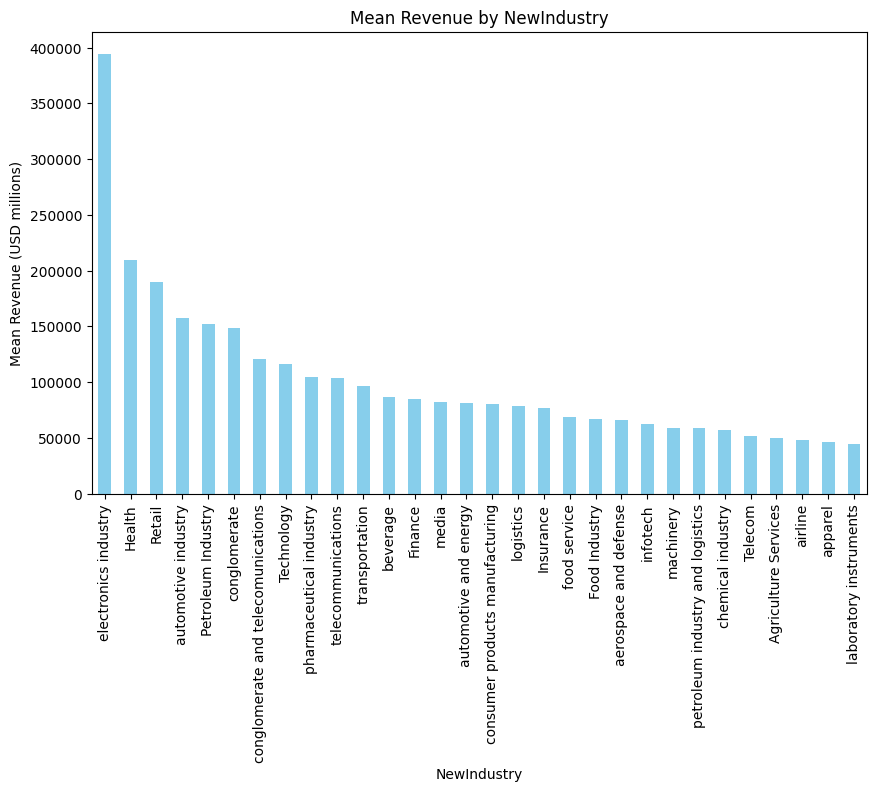

In [173]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sorted_groups['Revenue (USD millions) mean'].plot(kind='bar', color='skyblue')
plt.title('Mean Revenue by NewIndustry')
plt.xlabel('NewIndustry')
plt.ylabel('Mean Revenue (USD millions)')
plt.show()